# Get coordinates of highest amplitude contour in wavelets power spectums

We got plenty of power spectrum from TEC data, one for each satellite-station path. We have data of about 40 stations and each station collected data from about 32 satellites (about 4 to 10 satellites detected a ionospheric perturbation) which means that we may have about 300 to 400 TEC power spectrums. We need to collect the coordinates of the maximum amplitude of the wavelets, so we can make an histogram to find the most detected frequencies of perturbations. Then, for each frequency, find the time and spatial coordinates each perturbation was detected and try to estimate the velocity of the perturbation based on the time and space difference, but first find the first contour (with the highest amplitude)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../wavelets/wave_python")
from midpoint import MidpointNormalize
from waveletFunctions import wavelet, wave_signif

In [2]:
df = pd.read_csv("./data/2019-06-22/set1/2019-06-22_21.43_detrended-sTEC.csv")

In [3]:
norm = MidpointNormalize(midpoint=0)

In [120]:
prn_mask = df["PRN"] ==2
s_mask = df["Station"] == "bara"

In [121]:
time = df["Time"][prn_mask & s_mask]
TEC = df["sTEC"][prn_mask & s_mask]
dt = 15./3600

In [122]:
w, periods, scales, COI = wavelet(TEC, dt, pad=1)
power = np.abs(w)**2
f = 1e3/(3600.*periods)
levels = 20

C:\Users\giorg\AppData\Local\Temp/ipykernel_3632/1845400717.py:2: RuntimeWarning: divide by zero encountered in true_divide
  fcoi = 1e3/(3600.*COI)


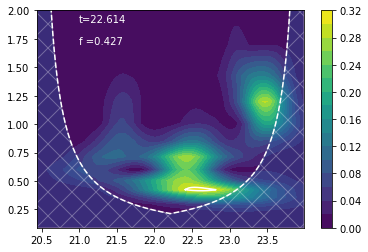

In [123]:
im1 = plt.contourf(time, f, power, levels)
fcoi = 1e3/(3600.*COI)
plt.plot(time, fcoi, "w--")
plt.ylim(min(f),2)
plt.colorbar()
dat0=im1.allsegs[-1]
for seg in dat0:
    plt.plot(seg[:,0], seg[:,1], "w")
    plt.text(21, 1.9, "t={:.3f}".format(np.mean(seg[:,0])), color="white")
    plt.text(21, 1.7, "f ={:.3f}".format(np.mean(seg[:,1])), color="white")
    plt.fill_between(time, f[-1], fcoi, facecolor=None, edgecolor="w", hatch="x", alpha=0.3)

In [124]:
im1.levels

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32])

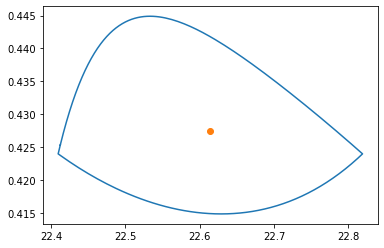

In [125]:
dat0=im1.allsegs[-1]
for seg in dat0:
    plt.plot(seg[:,0], seg[:,1])
    plt.plot(np.mean(seg[:,0]), np.mean(seg[:,1]), "o")

At least this approach finds the contour with maximum amplitude, and as far as I could see, is always 1. If other wavelets appear, the have less amplitude, we will neglect them by now. For now, let's collect these coordinates and make an histogram with it =)